# 作业一：数据探索性分析与数据预处理

**姓名**：徐恒达  
**学号**：1120151811  
**学院**：计算机学院  
**年级**：本科大四  

**GitHub**: <https://github.com/DaDaMrX/data-mining>

# 目录

### 1. 数据集1：Wine Reviews
**1.1 数据摘要**  
- 数据信息  
- 缺失值统计  
- 数值数据摘要  
- 标称属性摘要  

**1.2 数据可视化**  
- 直方图与qq图  
- 盒图  

**1.3 处理缺失数据**  
- 处理缺失标称数据  
- 处理缺失数值数据  

### 2. 数据集2：Wine Reviews
**2.1 数据摘要**  
- 数据信息  
- 缺失值统计  
- 数值数据摘要  
- 标称属性摘要  

**2.2 数据可视化**  
- 直方图与qq图  
- 盒图  

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

# 1. 数据集1：Wine Reviews

数据集主页：<https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv>

**加载数据**

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')

## 1.1 数据摘要

包括“数据信息”、“缺失值统计”、“数值数据摘要”、“标称数据摘要”共4部分。

### 数据信息

数据集中共有14列，129971行。其中有3列是数值属性，11列是标称属性。

In [3]:
print('%d columns' % len(df.columns))
print('%d rows' % len(df.index))
print()
print(df.dtypes.value_counts())

14 columns
129971 rows

object     11
int64       2
float64     1
dtype: int64


数据集中的前5行展示如下。

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 缺失值统计

统计每一列中的缺失值数量如下。

In [5]:
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

### 数值数据摘要

数值属性列中，第一列是数据id列不于考虑，对于另外的两个数值属性`points`和`price`，统计它们的有效值数量，平均值，标准差，最小值，最大值，第1四分位点，中位数，第3四分位点信息如下。

In [6]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


### 标称属性摘要

定义`summary_column(col_name)`函数，统计标称属性`col_name`中不同值出现的频数和频率，并展示出现频率最高的前15个值。

In [7]:
def summary_column(col_name):
    col = df[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = df[col_name].value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    col_df.rename(columns={'designation': 'counts'}, inplace=True)
    print(col_df.iloc[:15])
    print('...')
    plt.bar(np.arange(15), col.iloc[:15])
    plt.title(col_name)
    plt.show()

统计**designation**列如下。

Colunm name: designation
37979 different values.

                 counts  frequency
Reserve            2009   0.052898
Estate             1322   0.034809
Reserva            1259   0.033150
Riserva             698   0.018379
Estate Grown        621   0.016351
Brut                513   0.013507
Dry                 413   0.010874
Barrel sample       375   0.009874
Crianza             343   0.009031
Estate Bottled      342   0.009005
Vieilles Vignes     308   0.008110
Brut Rosé           276   0.007267
Gran Reserva        261   0.006872
Barrel Sample       252   0.006635
Tradition           238   0.006267
...


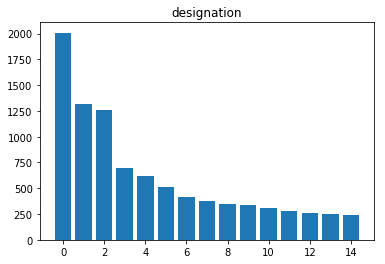

In [8]:
summary_column('designation')

统计**province**列如下。

Colunm name: province
425 different values.

                    province  frequency
California             36247  85.287059
Washington              8639  20.327059
Bordeaux                5941  13.978824
Tuscany                 5897  13.875294
Oregon                  5373  12.642353
Burgundy                3980   9.364706
Northern Spain          3851   9.061176
Piedmont                3729   8.774118
Mendoza Province        3264   7.680000
Veneto                  2716   6.390588
New York                2688   6.324706
Alsace                  2440   5.741176
Northeastern Italy      2138   5.030588
Loire Valley            1856   4.367059
Sicily & Sardinia       1797   4.228235
...


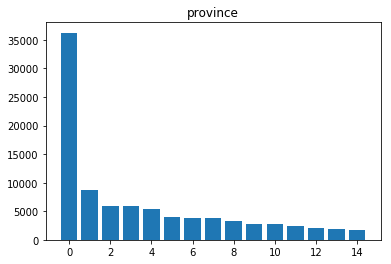

In [9]:
summary_column('province')

## 1.2 数据可视化

包括“直方图与qq图”、“盒图”共2部分

### 直方图与qq图

定义函数`distrib(col_name)`，对指定数值属性列`distrib(col_name)`，首先展示其频率分布直方图，然后将其标准化为均值为0，方差为1的分布，与标准正态分布一起绘制qq图。

In [10]:
def distrib(col_name):
    col = df[col_name].dropna()
    plt.hist(col, 20)
    plt.title(col_name)
    plt.show()
    
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()

展示**points**列如下。从qq图中可以看出，**points**列中的数据近似满足正态分布。

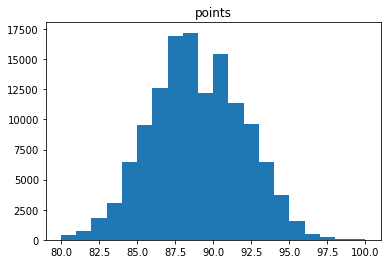

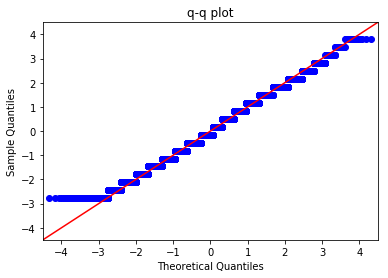

In [11]:
distrib('points')

展示**price**列如下。从qq图中可以看出，**price**列中的数据不满足正态分布。

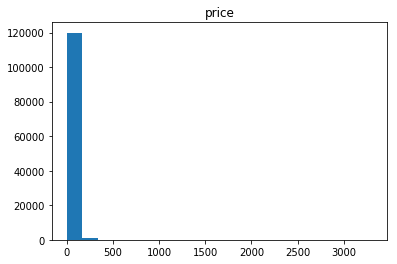

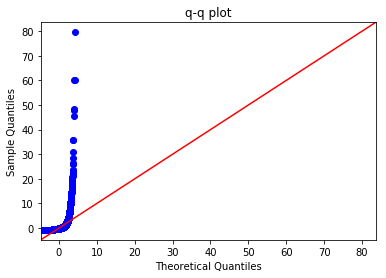

In [12]:
distrib('price')

### 盒图

定义函数`boxplot(col_name)`来为指定列绘制盒图。

In [13]:
def boxplot(col_name):
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(col_name)
    ax.boxplot(df[col_name].dropna())
    plt.show()

为**points**列绘制盒图如下所示。

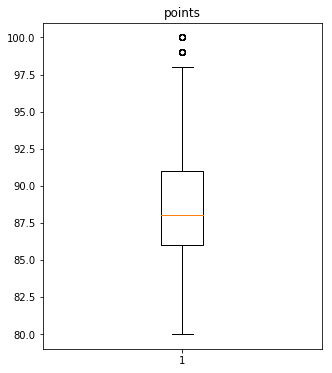

In [14]:
boxplot('points')

为**price**列绘制盒图如下所示。从盒图中可以看出，**price**列中的数据偏向于较小的数值，数值越大，数据点越少。

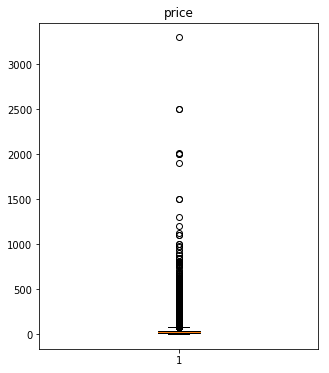

In [15]:
boxplot('price')

## 1.3 处理缺失数据

包括“处理缺失标称数据”与“处理缺失数值数据”两部分。

### 处理缺失标称数据

定义函数`show_column(col)`来展示数据。

In [16]:
def show_column(col):
    col = col.value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    col_df.rename(columns={'designation': 'counts'}, inplace=True)
    print(col_df.iloc[:15])
    print('...')
    plt.bar(np.arange(15), col.iloc[:15])
    plt.title(col_name)
    plt.show()

**designation**列中共有129971个数据，其中37465个数据为空数据。

In [17]:
col_name = 'designation'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: designation
total: 129971
nan: 37465


删除**designation**列中的空数据，结果统计如下。

                 counts  frequency
Reserve            2009   0.052898
Estate             1322   0.034809
Reserva            1259   0.033150
Riserva             698   0.018379
Estate Grown        621   0.016351
Brut                513   0.013507
Dry                 413   0.010874
Barrel sample       375   0.009874
Crianza             343   0.009031
Estate Bottled      342   0.009005
Vieilles Vignes     308   0.008110
Brut Rosé           276   0.007267
Gran Reserva        261   0.006872
Barrel Sample       252   0.006635
Tradition           238   0.006267
...


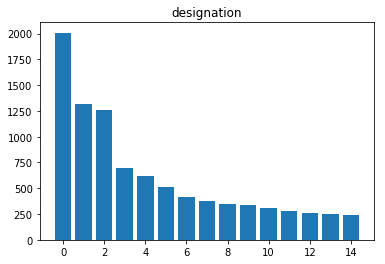

In [18]:
col_1 = col.dropna()
show_column(col_1)

将**designation**列中的空数据替换为出现频率最高的数据，结果统计如下。

                 counts  frequency
Reserve           39474   1.039364
Estate             1322   0.034809
Reserva            1259   0.033150
Riserva             698   0.018379
Estate Grown        621   0.016351
Brut                513   0.013507
Dry                 413   0.010874
Barrel sample       375   0.009874
Crianza             343   0.009031
Estate Bottled      342   0.009005
Vieilles Vignes     308   0.008110
Brut Rosé           276   0.007267
Gran Reserva        261   0.006872
Barrel Sample       252   0.006635
Tradition           238   0.006267
...


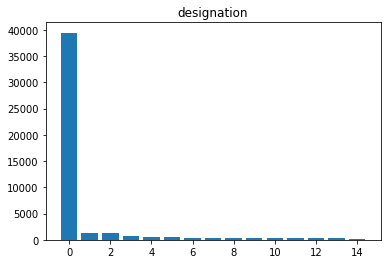

In [19]:
col_2 = col.fillna(col.mode()[0])
show_column(col_2)

### 处理缺失数值数据

定义函数`show_plot(col)`和`show_describe(col)`来展示数据的信息。

In [20]:
def show_plot(col):
    plt.hist(col, 20)
    plt.title('bar')
    plt.show()
    
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()
    
def show_describe(col):
    print(col.describe())

**price**列中共有129971个数据，其中8996个数据为空数据。

In [21]:
col_name = 'price'
col = df[col_name]

print('colomn:', col_name)
print('total:', len(col))
print('nan:', col.isna().sum())

colomn: price
total: 129971
nan: 8996


去除**price**列中的空数据，展示如下。

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64


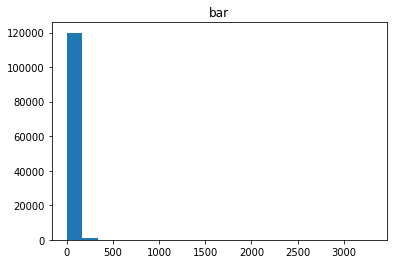

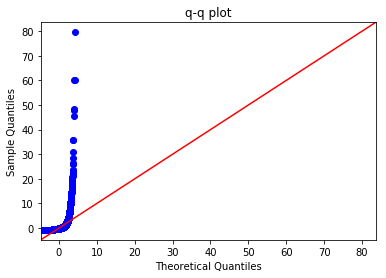

In [22]:
col_1 = col.dropna()
show_describe(col_1)
show_plot(col_1)

将**price**列中的空数据用出现频率最高的数替代，展示如下。

count    129971.000000
mean         34.300005
std          39.768715
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


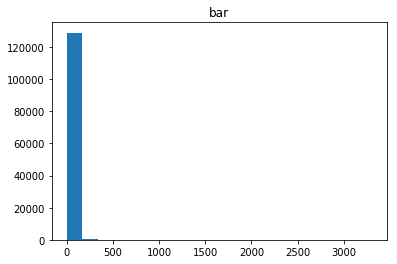

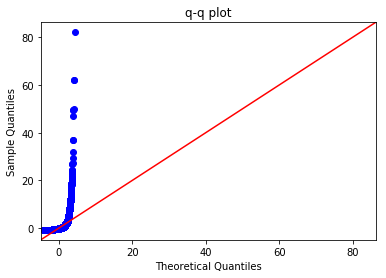

In [23]:
col_2 = col.fillna(col.mode()[0])
show_describe(col_2)
show_plot(col_2)

# 2. 数据集2：MLB Pitch Data 2015-2018

数据集主页：<https://www.kaggle.com/pschale/mlb-pitch-data-20152018#atbats.csv>

**加载数据**

In [24]:
df = pd.read_csv('atbats.csv')

## 2.1 数据摘要

包括“数据信息”、“缺失值统计”、“数值数据摘要”、“标称数据摘要”共4部分。

### 数据信息

数据集中共有11列，740389行。其中有7列是数值属性，3列是标称属性，1列是boolean属性。

In [25]:
print('%d columns' % len(df.columns))
print('%d rows' % len(df.index))
print()
print(df.dtypes.value_counts())

11 columns
740389 rows

int64     7
object    3
bool      1
dtype: int64


数据集中的前5行展示如下。

In [26]:
df.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


### 缺失值统计

统计每一列中的缺失值数量如下。本数据集中没有缺失值。

In [27]:
df.isna().sum()

ab_id         0
batter_id     0
event         0
g_id          0
inning        0
o             0
p_score       0
p_throws      0
pitcher_id    0
stand         0
top           0
dtype: int64

### 数值数据摘要

统计7个数值属性列的数据数量，平均值，标准差，最小值，最大值，第1四分位点，中位数，第3四分位点信息如下。

In [28]:
df.describe()

,ab_id,batter_id,g_id,inning,o,p_score,pitcher_id
count,7.403890e+05,740389.000000,7.403890e+05,740389.000000,740389.000000,740389.000000,740389.000000
mean,2.016596e+09,520222.971504,2.016516e+08,5.008161,1.676713,2.286258,526829.729136
std,1.118980e+06,81257.093703,1.117423e+05,2.656350,0.954318,2.630178,78213.760533
min,2.015000e+09,112526.000000,2.015000e+08,1.000000,0.000000,0.000000,112526.000000
25%,2.016001e+09,457759.000000,2.016000e+08,3.000000,1.000000,0.000000,462136.000000
50%,2.017001e+09,519317.000000,2.017000e+08,5.000000,2.000000,1.000000,534910.000000
75%,2.018000e+09,592273.000000,2.018000e+08,7.000000,2.000000,4.000000,592836.000000
max,2.018186e+09,673633.000000,2.018024e+08,19.000000,3.000000,25.000000,673633.000000


### 标称属性摘要

定义`summary_column(col_name)`函数，统计标称属性`col_name`中不同值出现的频数和频率，并展示出现频率最高的前15个值。

In [29]:
def summary_column(col_name):
    col = df[col_name].value_counts()
    print('Colunm name:', col_name)
    print('%d different values.' % len(col))
    print()
    col = df[col_name].value_counts()
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(col))
    col_df.rename(columns={'designation': 'counts'}, inplace=True)
    print(col_df.iloc[:15])
    print('...')
    plt.bar(np.arange(15), col.iloc[:15])
    plt.title(col_name)
    plt.show()

统计**event**列如下。

Colunm name: event
30 different values.

                   event    frequency
Strikeout         157128  5237.600000
Groundout         134893  4496.433333
Single            108794  3626.466667
Flyout             80731  2691.033333
Walk               56894  1896.466667
Lineout            44934  1497.800000
Pop Out            34455  1148.500000
Double             33157  1105.233333
Home Run           22209   740.300000
Forceout           15112   503.733333
Grounded Into DP   14717   490.566667
Hit By Pitch        6938   231.266667
Field Error         6390   213.000000
Sac Fly             4773   159.100000
Sac Bunt            3969   132.300000
...


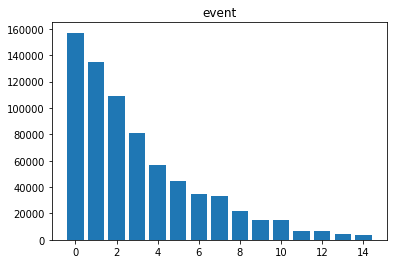

In [30]:
summary_column('event')

## 2.2 数据可视化

包括“直方图与qq图”、“盒图”共2部分

### 直方图与qq图

定义函数`distrib(col_name)`，对指定数值属性列`distrib(col_name)`，首先展示其频率分布直方图，然后将其标准化为均值为0，方差为1的分布，与标准正态分布一起绘制qq图。

In [31]:
def distrib(col_name):
    col = df[col_name].dropna()
    plt.hist(col, 20)
    plt.title(col_name)
    plt.show()
    
    col = (col - col.mean()) / col.std()
    fig = sm.qqplot(col, line='45')
    plt.title('q-q plot')
    plt.show()

展示**p_score**列如下。从qq图中可以看出，**p_score**列中的数据不满足正态分布。

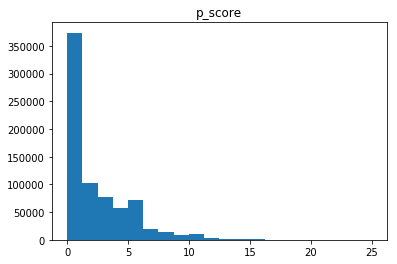

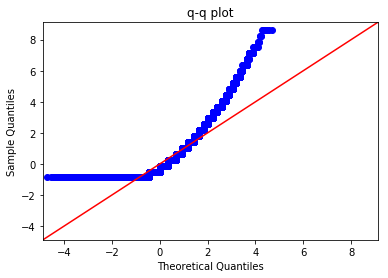

In [32]:
distrib('p_score')

### 盒图

定义函数`boxplot(col_name)`来为指定列绘制盒图。

In [33]:
def boxplot(col_name):
    fig, ax = plt.subplots(figsize=(5, 6))
    ax.set_title(col_name)
    ax.boxplot(df[col_name].dropna())
    plt.show()

为**p_score**列绘制盒图如下所示。从盒图中可以看出，**p_score**列中的数据偏向于较小的数值。

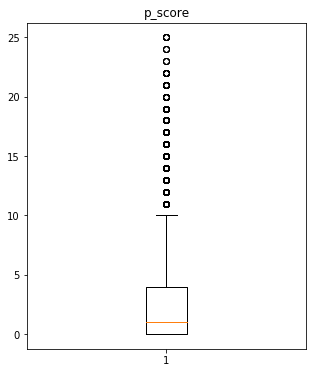

In [34]:
boxplot('p_score')